<a href="https://www.kaggle.com/code/ankumagawa/technology-similarity?scriptVersionId=93065500" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-ratio1/Medical Ratio.csv
/kaggle/input/ipc-subclass-matrix/37 PHARMA COMPANY - IPC SUBCLASS MATRIX.csv


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('../input/ipc-subclass-matrix/37 PHARMA COMPANY - IPC SUBCLASS MATRIX.csv')
df

,COMPANY,A01C,A01G,A01H,A01K,A01M,A01N,A01P,A21D,A23B,...,H02N,H03L,H03M,H04B,H04L,H04N,H04R,H04W,H05B,H05K
0,ASKA PHARMA HOLDINGS,0,0,0,0,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ASTELLAS PHARMA INC,0,0,0,21,0,32,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2,BIOFERMIN PHARMA,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHUGAI PHARMA,1,0,0,67,25,63,2,0,0,...,0,0,0,0,0,0,0,3,1,0
4,DAIICHI SANKYO CO LTD,0,1,0,15,0,31,4,0,0,...,1,0,0,1,0,0,0,0,0,0
5,DAINIPPON SUMITOMO,0,0,1,14,0,8,1,0,0,...,0,0,0,0,1,0,0,3,0,2
6,DAITO PHARMA,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,EIKEN CHEMICAL CO LTD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,EISAI CO LTD,0,0,0,22,0,50,1,0,0,...,0,0,2,3,10,0,0,0,0,0
9,FUJI PHARMA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.isnull().sum()

COMPANY    0
A01C       0
A01G       0
A01H       0
A01K       0
          ..
H04N       0
H04R       0
H04W       0
H05B       0
H05K       0
Length: 273, dtype: int64

In [5]:
df=df.drop(columns=['COMPANY'],axis=1)
df

,A01C,A01G,A01H,A01K,A01M,A01N,A01P,A21D,A23B,A23C,...,H02N,H03L,H03M,H04B,H04L,H04N,H04R,H04W,H05B,H05K
0,0,0,0,0,1,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,21,0,32,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,67,25,63,2,0,0,0,...,0,0,0,0,0,0,0,3,1,0
4,0,1,0,15,0,31,4,0,0,0,...,1,0,0,1,0,0,0,0,0,0
5,0,0,1,14,0,8,1,0,0,0,...,0,0,0,0,1,0,0,3,0,2
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,22,0,50,1,0,0,0,...,0,0,2,3,10,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# standardize the whole data
df1=df.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_stand = scaler.fit_transform(df1)
scaled_stand

array([[-0.31118796, -0.27380952, -0.23904572, ..., -0.21598323,
        -0.23904572, -0.18219572],
       [-0.31118796, -0.27380952, -0.23904572, ..., -0.21598323,
        -0.23904572, -0.18219572],
       [-0.31118796, -0.27380952, -0.23904572, ..., -0.21598323,
        -0.23904572, -0.18219572],
       ...,
       [-0.31118796, -0.27380952, -0.23904572, ..., -0.21598323,
        -0.23904572, -0.18219572],
       [ 1.33366267,  5.45238095, -0.23904572, ..., -0.21598323,
        -0.23904572, -0.18219572],
       [-0.31118796, -0.27380952, -0.23904572, ..., -0.21598323,
        -0.23904572, -0.18219572]])

In [7]:
#normalize the data
df2=df.copy()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_nor = scaler.fit_transform(df2)
scaled_nor

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [8]:
# import the cosine_similarity library
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
# cosine for standardized data
df_cosine_stand=pd.DataFrame(cosine_similarity(scaled_stand,dense_output=True))
df_cosine_stand

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.000000,-0.060580,0.597417,-0.125542,-0.205481,0.013098,0.376953,0.210188,-0.147303,0.255018,...,0.665745,0.079889,-0.100910,0.017298,-0.057469,0.038386,0.554818,0.399512,0.027890,0.184613
1,-0.060580,1.000000,-0.056923,-0.023372,0.015293,-0.034362,-0.062751,-0.014511,0.012686,-0.066873,...,-0.066136,-0.040679,0.046983,-0.055452,-0.043386,-0.014715,-0.085685,-0.081280,0.065840,0.035718
2,0.597417,-0.056923,1.000000,-0.221160,-0.238039,-0.092516,0.483959,0.289070,-0.235151,0.332604,...,0.845617,0.112946,-0.072614,0.034700,0.056701,0.002045,0.707539,0.490433,0.055982,0.244792
3,-0.125542,-0.023372,-0.221160,1.000000,0.010029,-0.030374,-0.156679,-0.032083,-0.024550,-0.091563,...,-0.211652,-0.059183,-0.034893,-0.077355,-0.018873,-0.039790,-0.192100,-0.164084,-0.031300,-0.108170
4,-0.205481,0.015293,-0.238039,0.010029,1.000000,-0.026224,-0.167294,-0.133482,-0.003384,-0.136954,...,-0.223042,-0.039299,0.088568,-0.080938,-0.004473,-0.084796,-0.181350,-0.147050,-0.039747,-0.119304
5,0.013098,-0.034362,-0.092516,-0.030374,-0.026224,1.000000,-0.076350,-0.055693,-0.001670,-0.032406,...,-0.087216,-0.020331,-0.025630,-0.060558,-0.057244,-0.057480,-0.075783,0.028528,-0.076196,-0.011897
6,0.376953,-0.062751,0.483959,-0.156679,-0.167294,-0.076350,1.000000,0.173494,-0.153269,0.208628,...,0.546527,0.064959,-0.063746,0.014290,-0.057674,-0.023020,0.451086,0.309157,0.029707,0.150015
7,0.210188,-0.014511,0.289070,-0.032083,-0.133482,-0.055693,0.173494,1.000000,-0.107508,0.204227,...,0.328827,0.058279,-0.048656,-0.016780,0.028224,-0.003450,0.261511,0.171211,-0.016087,0.075782
8,-0.147303,0.012686,-0.235151,-0.024550,-0.003384,-0.001670,-0.153269,-0.107508,1.000000,-0.142914,...,-0.249124,-0.073790,0.049451,-0.081982,-0.055575,-0.074444,-0.206857,-0.173312,-0.051285,-0.122751
9,0.255018,-0.066873,0.332604,-0.091563,-0.136954,-0.032406,0.208628,0.204227,-0.142914,1.000000,...,0.371192,0.027977,-0.110464,-0.000910,0.033416,-0.016074,0.308950,0.206841,0.019926,0.096459


In [10]:
#cosine for the normalized data
df_cosine_nor=pd.DataFrame(cosine_similarity(scaled_nor,dense_output=True))
df_cosine_nor

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.000000,0.058915,0.007061,0.143953,0.049008,0.201058,1.342471e-03,1.235031e-05,0.144845,0.000578,...,0.026000,0.016470,0.078763,0.008783,0.060477,0.145900,0.002438,0.024224,0.004065,0.008041
1,0.058915,1.000000,0.044663,0.133065,0.211790,0.134692,8.846972e-03,1.127105e-01,0.223396,0.001775,...,0.128187,0.093471,0.251934,0.025833,0.160483,0.101980,0.005188,0.023527,0.201168,0.105903
2,0.007061,0.044663,1.000000,0.019970,0.022598,0.012630,5.864062e-04,1.398364e-02,0.016267,0.000267,...,0.027177,0.003563,0.222202,0.000939,0.281812,0.068992,0.000443,0.004118,0.000920,0.006459
3,0.143953,0.133065,0.019970,1.000000,0.185941,0.146547,1.084332e-02,2.161553e-01,0.142203,0.103431,...,0.216344,0.112046,0.144933,0.026418,0.218856,0.097308,0.066184,0.046735,0.088115,0.028503
4,0.049008,0.211790,0.022598,0.185941,1.000000,0.161317,1.311408e-02,4.596355e-02,0.184466,0.012175,...,0.271220,0.165328,0.280716,0.028100,0.222659,0.035611,0.124385,0.092532,0.094705,0.028805
5,0.201058,0.134692,0.012630,0.146547,0.161317,1.000000,3.638206e-03,4.734737e-02,0.187565,0.047404,...,0.108406,0.116117,0.139748,0.023201,0.131364,0.049949,0.047027,0.170226,0.019107,0.087595
6,0.001342,0.008847,0.000586,0.010843,0.013114,0.003638,1.000000e+00,8.116238e-07,0.027095,0.000051,...,0.027616,0.004880,0.064109,0.001928,0.010718,0.004066,0.000050,0.001449,0.004605,0.001449
7,0.000012,0.112710,0.013984,0.216155,0.045964,0.047347,8.116238e-07,1.000000e+00,0.070537,0.233980,...,0.064934,0.070329,0.119718,0.002664,0.220297,0.081657,0.000177,0.006407,0.000132,0.007895
8,0.144845,0.223396,0.016267,0.142203,0.184466,0.187565,2.709464e-02,7.053731e-02,1.000000,0.001160,...,0.101208,0.113848,0.230049,0.023921,0.153089,0.047874,0.065446,0.049239,0.094118,0.019684
9,0.000578,0.001775,0.000267,0.103431,0.012175,0.047404,5.134563e-05,2.339796e-01,0.001160,1.000000,...,0.001547,0.000260,0.001318,0.000038,0.175318,0.038668,0.000036,0.000457,0.014258,0.000408


In [11]:
#cosine for original data
df_cosine_ori=pd.DataFrame(cosine_similarity(df2,dense_output=True))
df_cosine_ori

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.000000,0.926260,0.932461,0.965767,0.961672,0.976461,0.846179,0.131957,0.933754,0.627593,...,0.735301,0.959082,0.933361,0.836347,0.914684,0.903486,0.973218,0.708706,0.825001,0.814084
1,0.926260,1.000000,0.996901,0.991471,0.993988,0.985496,0.971411,0.152368,0.999545,0.867065,...,0.936301,0.953906,0.999729,0.773398,0.998722,0.997711,0.831815,0.922077,0.972863,0.972248
2,0.932461,0.996901,1.000000,0.991411,0.993698,0.986730,0.970876,0.156782,0.997680,0.854061,...,0.924925,0.955878,0.997180,0.777032,0.997640,0.993177,0.842254,0.909859,0.967564,0.965903
3,0.965767,0.991471,0.991411,1.000000,0.999277,0.998347,0.945952,0.154379,0.993815,0.800952,...,0.884113,0.972975,0.993816,0.812023,0.986601,0.982481,0.893032,0.865562,0.939742,0.934931
4,0.961672,0.993988,0.993698,0.999277,1.000000,0.998023,0.950443,0.146063,0.995899,0.811164,...,0.892763,0.970043,0.995903,0.803815,0.989878,0.985826,0.885492,0.874765,0.945793,0.941644
5,0.976461,0.985496,0.986730,0.998347,0.998023,1.000000,0.933720,0.145310,0.988680,0.775940,...,0.863670,0.974541,0.988530,0.817530,0.979774,0.974056,0.910699,0.843633,0.924940,0.919607
6,0.846179,0.971411,0.970876,0.945952,0.950443,0.933720,1.000000,0.138700,0.969968,0.910058,...,0.960505,0.907126,0.969187,0.726718,0.978469,0.977645,0.730548,0.952379,0.978459,0.982481
7,0.131957,0.152368,0.156782,0.154379,0.146063,0.145310,0.138700,1.000000,0.150704,0.147114,...,0.135312,0.156996,0.154736,0.200397,0.147429,0.147511,0.121088,0.133885,0.149868,0.139676
8,0.933754,0.999545,0.997680,0.993815,0.995899,0.988680,0.969968,0.150704,1.000000,0.857011,...,0.928593,0.957965,0.999781,0.781938,0.998210,0.996201,0.843120,0.913688,0.968938,0.967586
9,0.627593,0.867065,0.854061,0.800952,0.811164,0.775940,0.910058,0.147114,0.857011,1.000000,...,0.974946,0.733447,0.857747,0.521373,0.879390,0.890514,0.469996,0.979215,0.937427,0.950434


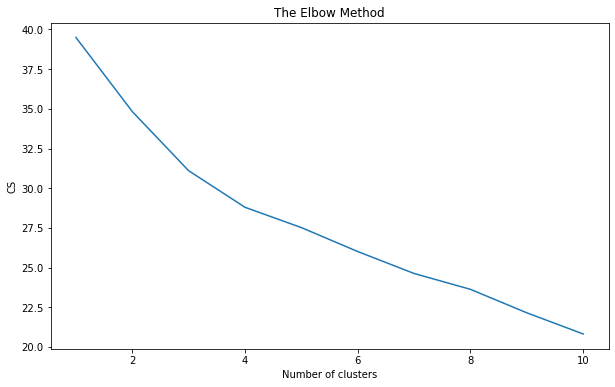

In [12]:
#Elblow for normalized data
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
cs = []
plt.figure(figsize=(10,6))
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_cosine_nor)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

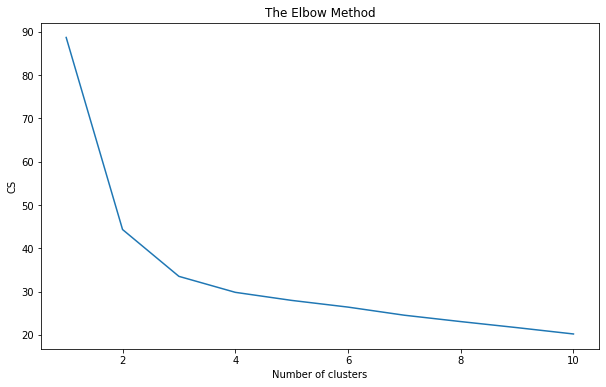

In [13]:
#Elbow for standardized data
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
cs = []
plt.figure(figsize=(10,6))
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_cosine_stand)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

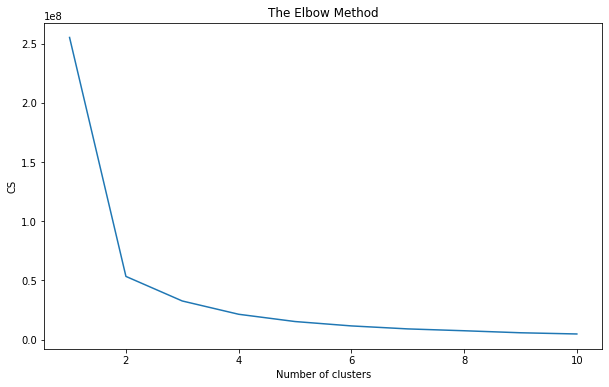

In [14]:
#Elbow for Original data
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
cs = []
plt.figure(figsize=(10,6))
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df2)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

## K-means Clusters for Standardized Data

In [15]:

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

In [16]:
df_cosine_stand

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.000000,-0.060580,0.597417,-0.125542,-0.205481,0.013098,0.376953,0.210188,-0.147303,0.255018,...,0.665745,0.079889,-0.100910,0.017298,-0.057469,0.038386,0.554818,0.399512,0.027890,0.184613
1,-0.060580,1.000000,-0.056923,-0.023372,0.015293,-0.034362,-0.062751,-0.014511,0.012686,-0.066873,...,-0.066136,-0.040679,0.046983,-0.055452,-0.043386,-0.014715,-0.085685,-0.081280,0.065840,0.035718
2,0.597417,-0.056923,1.000000,-0.221160,-0.238039,-0.092516,0.483959,0.289070,-0.235151,0.332604,...,0.845617,0.112946,-0.072614,0.034700,0.056701,0.002045,0.707539,0.490433,0.055982,0.244792
3,-0.125542,-0.023372,-0.221160,1.000000,0.010029,-0.030374,-0.156679,-0.032083,-0.024550,-0.091563,...,-0.211652,-0.059183,-0.034893,-0.077355,-0.018873,-0.039790,-0.192100,-0.164084,-0.031300,-0.108170
4,-0.205481,0.015293,-0.238039,0.010029,1.000000,-0.026224,-0.167294,-0.133482,-0.003384,-0.136954,...,-0.223042,-0.039299,0.088568,-0.080938,-0.004473,-0.084796,-0.181350,-0.147050,-0.039747,-0.119304
5,0.013098,-0.034362,-0.092516,-0.030374,-0.026224,1.000000,-0.076350,-0.055693,-0.001670,-0.032406,...,-0.087216,-0.020331,-0.025630,-0.060558,-0.057244,-0.057480,-0.075783,0.028528,-0.076196,-0.011897
6,0.376953,-0.062751,0.483959,-0.156679,-0.167294,-0.076350,1.000000,0.173494,-0.153269,0.208628,...,0.546527,0.064959,-0.063746,0.014290,-0.057674,-0.023020,0.451086,0.309157,0.029707,0.150015
7,0.210188,-0.014511,0.289070,-0.032083,-0.133482,-0.055693,0.173494,1.000000,-0.107508,0.204227,...,0.328827,0.058279,-0.048656,-0.016780,0.028224,-0.003450,0.261511,0.171211,-0.016087,0.075782
8,-0.147303,0.012686,-0.235151,-0.024550,-0.003384,-0.001670,-0.153269,-0.107508,1.000000,-0.142914,...,-0.249124,-0.073790,0.049451,-0.081982,-0.055575,-0.074444,-0.206857,-0.173312,-0.051285,-0.122751
9,0.255018,-0.066873,0.332604,-0.091563,-0.136954,-0.032406,0.208628,0.204227,-0.142914,1.000000,...,0.371192,0.027977,-0.110464,-0.000910,0.033416,-0.016074,0.308950,0.206841,0.019926,0.096459


In [17]:
#Load Data
data = df_cosine_stand
pca = PCA(2)

In [18]:
#Transform the data
transform = pca.fit_transform(data)
 
#Import KMeans module
from sklearn.cluster import KMeans

In [19]:
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(transform)
 
#Getting unique labels
u_labels = np.unique(label)

In [20]:
display (label)
display (u_labels)

array([0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0,
       2, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 2], dtype=int32)

array([0, 1, 2], dtype=int32)

In [21]:
df_name=pd.read_csv('../input/ipc-subclass-matrix/37 PHARMA COMPANY - IPC SUBCLASS MATRIX.csv')
df_name

,COMPANY,A01C,A01G,A01H,A01K,A01M,A01N,A01P,A21D,A23B,...,H02N,H03L,H03M,H04B,H04L,H04N,H04R,H04W,H05B,H05K
0,ASKA PHARMA HOLDINGS,0,0,0,0,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ASTELLAS PHARMA INC,0,0,0,21,0,32,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2,BIOFERMIN PHARMA,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHUGAI PHARMA,1,0,0,67,25,63,2,0,0,...,0,0,0,0,0,0,0,3,1,0
4,DAIICHI SANKYO CO LTD,0,1,0,15,0,31,4,0,0,...,1,0,0,1,0,0,0,0,0,0
5,DAINIPPON SUMITOMO,0,0,1,14,0,8,1,0,0,...,0,0,0,0,1,0,0,3,0,2
6,DAITO PHARMA,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,EIKEN CHEMICAL CO LTD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,EISAI CO LTD,0,0,0,22,0,50,1,0,0,...,0,0,2,3,10,0,0,0,0,0
9,FUJI PHARMA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#group of company using the normalized data
data={'Name':df_name['COMPANY'],'Cluster':label}
company_list_nor=pd.DataFrame(data)
company_list_nor

,Name,Cluster
0,ASKA PHARMA HOLDINGS,0
1,ASTELLAS PHARMA INC,1
2,BIOFERMIN PHARMA,0
3,CHUGAI PHARMA,1
4,DAIICHI SANKYO CO LTD,1
5,DAINIPPON SUMITOMO,1
6,DAITO PHARMA,0
7,EIKEN CHEMICAL CO LTD,2
8,EISAI CO LTD,1
9,FUJI PHARMA,2


# K-means cluster for Standardized data (k=2)

In [23]:
#group the company of standardized data
#Load Data
data = df_cosine_stand
pca = PCA(2)
#Transform the data
transform = pca.fit_transform(data)
 
#Import KMeans module
from sklearn.cluster import KMeans
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(transform)
 
#Getting unique labels
u_labels = np.unique(label)
display (label)
display (u_labels)
data={'Name':df_name['COMPANY'],'Cluster':label}
company_list_nor=pd.DataFrame(data)
company_list_nor

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int32)

array([0, 1], dtype=int32)

,Name,Cluster
0,ASKA PHARMA HOLDINGS,0
1,ASTELLAS PHARMA INC,1
2,BIOFERMIN PHARMA,0
3,CHUGAI PHARMA,1
4,DAIICHI SANKYO CO LTD,1
5,DAINIPPON SUMITOMO,1
6,DAITO PHARMA,0
7,EIKEN CHEMICAL CO LTD,0
8,EISAI CO LTD,1
9,FUJI PHARMA,0


# DATA WITH RATIO

In [24]:
df_ratio=pd.read_csv('../input/medical-ratio1/Medical Ratio.csv')
df_ratio

,COMPANY,A01C,A01G,A01H,A01K,A01M,A01N,A01P,A21D,A23B,...,H02N,H03L,H03M,H04B,H04L,H04N,H04R,H04W,H05B,H05K
0,ASKA PHARMA HOLDINGS,0.000000,0.000000,0.000000,0.000000,0.000756,0.006803,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ASTELLAS PHARMA INC,0.000000,0.000000,0.000000,0.002385,0.000000,0.003634,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000227,0.000000,0.000000,0.000000,0.000000
2,BIOFERMIN PHARMA,0.000000,0.000000,0.000000,0.005208,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,CHUGAI PHARMA,0.000194,0.000000,0.000000,0.013030,0.004862,0.012252,0.000389,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000583,0.000194,0.000000
4,DAIICHI SANKYO CO LTD,0.000000,0.000079,0.000000,0.001182,0.000000,0.002443,0.000315,0.000000,0.000000,...,0.000079,0.000000,0.000000,0.000079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,DAINIPPON SUMITOMO,0.000000,0.000000,0.000137,0.001918,0.000000,0.001096,0.000137,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000137,0.000000,0.000000,0.000411,0.000000,0.000274
6,DAITO PHARMA,0.000000,0.000000,0.000000,0.000000,0.000000,0.012048,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,EIKEN CHEMICAL CO LTD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,EISAI CO LTD,0.000000,0.000000,0.000000,0.002617,0.000000,0.005949,0.000119,0.000000,0.000000,...,0.000000,0.000000,0.000238,0.000357,0.001190,0.000000,0.000000,0.000000,0.000000,0.000000
9,FUJI PHARMA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
df_name =df_ratio.iloc[:38,:1]
df_name

,COMPANY
0,ASKA PHARMA HOLDINGS
1,ASTELLAS PHARMA INC
2,BIOFERMIN PHARMA
3,CHUGAI PHARMA
4,DAIICHI SANKYO CO LTD
5,DAINIPPON SUMITOMO
6,DAITO PHARMA
7,EIKEN CHEMICAL CO LTD
8,EISAI CO LTD
9,FUJI PHARMA


In [26]:
# import the cosine_similarity library
from sklearn.metrics.pairwise import cosine_similarity

# Cosine similarity of Companies's Ratio:

In [27]:
df_ratio.drop(columns='COMPANY', index = 38, inplace=True)
df_ratio

,A01C,A01G,A01H,A01K,A01M,A01N,A01P,A21D,A23B,A23C,...,H02N,H03L,H03M,H04B,H04L,H04N,H04R,H04W,H05B,H05K
0,0.000000,0.000000,0.000000,0.000000,0.000756,0.006803,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.002385,0.000000,0.003634,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000227,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.005208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000194,0.000000,0.000000,0.013030,0.004862,0.012252,0.000389,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000583,0.000194,0.000000
4,0.000000,0.000079,0.000000,0.001182,0.000000,0.002443,0.000315,0.000000,0.000000,0.000000,...,0.000079,0.000000,0.000000,0.000079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000137,0.001918,0.000000,0.001096,0.000137,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000137,0.000000,0.000000,0.000411,0.000000,0.000274
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.012048,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.002617,0.000000,0.005949,0.000119,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000238,0.000357,0.001190,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
# cosine for standardized data
df_cosine_ratio=pd.DataFrame(cosine_similarity(df_ratio,dense_output=True))
df_cosine_ratio

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,1.000000,0.926260,0.932461,0.965767,0.961672,0.976461,0.846179,0.131957,0.933754,0.627593,...,0.959082,0.933361,0.836347,0.914684,0.903486,0.973218,0.708706,0.825001,0.814084,0.932359
1,0.926260,1.000000,0.996901,0.991471,0.993988,0.985496,0.971411,0.152368,0.999545,0.867065,...,0.953906,0.999729,0.773398,0.998722,0.997711,0.831815,0.922077,0.972863,0.972248,0.998594
2,0.932461,0.996901,1.000000,0.991411,0.993698,0.986730,0.970876,0.156782,0.997680,0.854061,...,0.955878,0.997180,0.777032,0.997640,0.993177,0.842254,0.909859,0.967564,0.965903,0.997138
3,0.965767,0.991471,0.991411,1.000000,0.999277,0.998347,0.945952,0.154379,0.993815,0.800952,...,0.972975,0.993816,0.812023,0.986601,0.982481,0.893032,0.865562,0.939742,0.934931,0.993535
4,0.961672,0.993988,0.993698,0.999277,1.000000,0.998023,0.950443,0.146063,0.995899,0.811164,...,0.970043,0.995903,0.803815,0.989878,0.985826,0.885492,0.874765,0.945793,0.941644,0.994888
5,0.976461,0.985496,0.986730,0.998347,0.998023,1.000000,0.933720,0.145310,0.988680,0.775940,...,0.974541,0.988530,0.817530,0.979774,0.974056,0.910699,0.843633,0.924940,0.919607,0.987605
6,0.846179,0.971411,0.970876,0.945952,0.950443,0.933720,1.000000,0.138700,0.969968,0.910058,...,0.907126,0.969187,0.726718,0.978469,0.977645,0.730548,0.952379,0.978459,0.982481,0.970058
7,0.131957,0.152368,0.156782,0.154379,0.146063,0.145310,0.138700,1.000000,0.150704,0.147114,...,0.156996,0.154736,0.200397,0.147429,0.147511,0.121088,0.133885,0.149868,0.139676,0.179951
8,0.933754,0.999545,0.997680,0.993815,0.995899,0.988680,0.969968,0.150704,1.000000,0.857011,...,0.957965,0.999781,0.781938,0.998210,0.996201,0.843120,0.913688,0.968938,0.967586,0.998934
9,0.627593,0.867065,0.854061,0.800952,0.811164,0.775940,0.910058,0.147114,0.857011,1.000000,...,0.733447,0.857747,0.521373,0.879390,0.890514,0.469996,0.979215,0.937427,0.950434,0.857869


# <span style="color:red">RATIO REPORT </span>

In [29]:
ratio_report= df_cosine_ratio.iloc[37:38, :]
ratio_report.columns=df_name['COMPANY']
pd.set_option('display.max_columns', None)
ratio_report.rename(index={37:'RATIO'},inplace =True)
ratio_report

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


COMPANY,ASKA PHARMA HOLDINGS,ASTELLAS PHARMA INC,BIOFERMIN PHARMA,CHUGAI PHARMA,DAIICHI SANKYO CO LTD,DAINIPPON SUMITOMO,DAITO PHARMA,EIKEN CHEMICAL CO LTD,EISAI CO LTD,FUJI PHARMA,FUSO PHARMA,HISAMITSU PHARMA,JCR PHARMA,KAKEN PHARMA,KISSEI PHARMA,KYORIN HOLDINGS INC,KYOWA KIRIN CO LTD,MOCHIDA PHARMA,NICHI-IKO PHARMA,NIPPON CHEMIPHAR,NIPPON SHINYAKU,NISSUI PHARMA,ONO PHARMA,OTSUKA HOLDINGS,PEPTIDREAM INC,ROHTO PHARMA,SANTEN PHARMA,SAWAI GROUP HOLDINGS,SEIKAGAKU CORP,SHIONOGI & CO LTD,TAIKO PHARMA,TAISHO PHARMA,TAKEDA PHARMA CO LTD,TORII PHARMA,TOWA PHARMA,TSUMURA & CO,ZERIA PHARMA,RATIO
RATIO,0.932359,0.998594,0.997138,0.993535,0.994888,0.987605,0.970058,0.179951,0.998934,0.857869,0.976598,0.906034,0.982916,0.980531,0.988746,0.956833,0.991728,0.997905,0.957399,0.990263,0.979838,0.910754,0.938282,0.976548,0.471735,0.936367,0.994824,0.927656,0.959495,0.998939,0.790278,0.997247,0.995561,0.842852,0.912908,0.969179,0.966665,1.0


In [30]:
df_tr = ratio_report.transpose()
df_tr.reset_index()
df_tr.sort_values(by='RATIO',ascending= False)

,RATIO
COMPANY,
RATIO,1.000000
SHIONOGI & CO LTD,0.998939
EISAI CO LTD,0.998934
ASTELLAS PHARMA INC,0.998594
MOCHIDA PHARMA,0.997905
TAISHO PHARMA,0.997247
BIOFERMIN PHARMA,0.997138
TAKEDA PHARMA CO LTD,0.995561
DAIICHI SANKYO CO LTD,0.994888


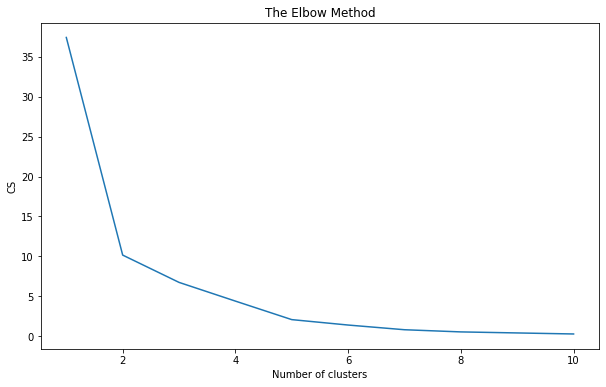

In [31]:
#Elblow for normalized data
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
cs = []
plt.figure(figsize=(10,6))
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_cosine_ratio)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

# Choose 2 clusters

In [32]:
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(transform)
 
#Getting unique labels
u_labels = np.unique(label)

In [33]:
df_tag= pd.read_csv('../input/medical-ratio1/Medical Ratio.csv')
df_tag=df_tag.drop(38)
df_tag

,COMPANY,A01C,A01G,A01H,A01K,A01M,A01N,A01P,A21D,A23B,A23C,A23D,A23F,A23G,A23J,A23K,A23L,A23P,A24B,A24F,A41D,A44B,A45B,A45C,A45D,A47C,A47F,A47G,A47K,A47L,A61B,A61C,A61D,A61F,A61G,A61H,A61J,A61K,A61L,A61M,A61N,A61P,A61Q,A62B,A62D,A63B,A63F,B01D,B01F,B01J,B01L,B02C,B03B,B03C,B04B,B04C,B05B,B05C,B05D,B06B,B07B,B07C,B08B,B09B,B21D,B23K,B23P,B24B,B24D,B25H,B25J,B26D,B26F,B27K,B27N,B28B,B29B,B29C,B29D,B29K,B29L,B30B,B31B,B32B,B33Y,B41F,B41J,B41K,B41M,B43K,B43M,B60C,B60J,B60K,B60N,B60R,B63B,B64D,B65B,B65C,B65D,B65G,B65H,B66B,B66F,B67B,B67C,B67D,B81B,B81C,B82Y,C01B,C01D,C01F,C01G,C02F,C03B,C03C,C04B,C05B,C05D,C05G,C06B,C06D,C07B,C07C,C07D,C07H,C07K,C07M,C08B,C08C,C08F,C08G,C08H,C08J,C08K,C08L,C09B,C09C,C09D,C09F,C09J,C09K,C10B,C10G,C10L,C10M,C10N,C11B,C11C,C11D,C12C,C12F,C12G,C12H,C12J,C12M,C12N,C12P,C12Q,C12R,C13B,C22B,C22C,C23C,C23F,C25B,C25D,C25F,C30B,C40B,C01F.1,C02G,C03D,C04B.1,D04C,D04H,D06M,D06P,D21B,D21C,D21H,E01B,E02B,E04B,E04C,E04F,E04H,E06B,E06C,F21B,F01N,F15B,F16B,F16C,F16D,F16F,F16K,F17C,F21S,F21V,F21Y,F23J,F23Q,F24F,F26B,F28D,G01B,G01D,G01F,C01G.1,G01H,G01J,G01M,G01P,G01R,G01V,G02B,G02C,G02F,G03B,G03C,G03F,G03G,G04F,G05B,G05F,G06G,C06K,G06M,G06N,G06Q,C07F,G07G,G08B,C08G.1,G09B,G09F,C09G,G11B,G11C,G16B,G16C,G16H,G21F,G21G,G21K,H01B,H01F,H01G,H01H,H01J,H01L,H01M,H01Q,H01R,H01S,H01T,H02H,H02J,H02K,H02M,H02N,H03L,H03M,H04B,H04L,H04N,H04R,H04W,H05B,H05K
0,ASKA PHARMA HOLDINGS,0.000000,0.000000,0.000000,0.000000,0.000756,0.006803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003023,0.001512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001512,0.000000,0.000000,0.348450,0.002268,0.000756,0.000000,0.629630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000756,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ASTELLAS PHARMA INC,0.000000,0.000000,0.000000,0.002385,0.000000,0.003634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [34]:
#group the company of standardized data
#Load Data
data = df_cosine_ratio
pca = PCA(2)
#Transform the data
transform = pca.fit_transform(data)
 
#Import KMeans module
from sklearn.cluster import KMeans
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(transform)
 
#Getting unique labels
u_labels = np.unique(label)
display (label)
display (u_labels)
data={'Name':df_tag['COMPANY'],'Cluster':label}
company_list_ratio=pd.DataFrame(data)
company_list_ratio

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

array([0, 1], dtype=int32)

,Name,Cluster
0,ASKA PHARMA HOLDINGS,0
1,ASTELLAS PHARMA INC,0
2,BIOFERMIN PHARMA,0
3,CHUGAI PHARMA,0
4,DAIICHI SANKYO CO LTD,0
5,DAINIPPON SUMITOMO,0
6,DAITO PHARMA,0
7,EIKEN CHEMICAL CO LTD,1
8,EISAI CO LTD,0
9,FUJI PHARMA,0


# Choose 5 clusters

In [35]:
#group the company of standardized data
#Load Data
data = df_cosine_ratio
pca = PCA(2)
#Transform the data
transform = pca.fit_transform(data)
 
#Import KMeans module
from sklearn.cluster import KMeans
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(transform)
 
#Getting unique labels
u_labels = np.unique(label)
display (label)
display (u_labels)
data={'Name':df_tag['COMPANY'],'Cluster':label}
company_list_ratio=pd.DataFrame(data)
company_list_ratio

array([2, 4, 4, 4, 4, 4, 0, 1, 4, 0, 4, 0, 0, 4, 4, 4, 4, 4, 0, 4, 4, 2,
       2, 0, 3, 0, 4, 0, 4, 4, 2, 4, 4, 2, 0, 0, 0, 4], dtype=int32)

array([0, 1, 2, 3, 4], dtype=int32)

,Name,Cluster
0,ASKA PHARMA HOLDINGS,2
1,ASTELLAS PHARMA INC,4
2,BIOFERMIN PHARMA,4
3,CHUGAI PHARMA,4
4,DAIICHI SANKYO CO LTD,4
5,DAINIPPON SUMITOMO,4
6,DAITO PHARMA,0
7,EIKEN CHEMICAL CO LTD,1
8,EISAI CO LTD,4
9,FUJI PHARMA,0


Divide the entire of the sample to different time-frame ( 5-years or 10-years)


how company will change from year to year


